# 一元线性回归（使用 nn模型）

In [1]:
import torch as t
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
#准备训练集
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                  [9.779],[6.182],[7.59],[2.167],[7.042],
                  [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

In [3]:
# 将numpy.array 转换成 Tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

In [4]:
# 建立模型：线性模型 y = w*x + b

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)# input and output are both 1 dimension
        
    def forward(self, x):#上面定义方法，这步实现操纵
        out = self.linear(x)
        return out

In [5]:
if t.cuda.is_available():#由于下面会出现cuda()报错，所以这里禁用，即不适用GPU加速
#    model = LinearRegression().cuda()
#else:
    model = LinearRegression()

In [6]:
criterion = nn.MSELoss()# 定义损失函数
optimizer = t.optim.SGD(model.parameters(),lr=1e-3)# 定义优化函数

In [7]:
# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    if t.cuda.is_available():
    #    inputs = Variable(x_train).cuda()
    #    target = Variable(y_train).cuda()
    #else:
        inputs = Variable(x_train)
        target = Variable(y_train)
    
    # forward
    out = model(inputs)
    loss = criterion(out,target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #按一定间隔显示计算数值
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1,num_epochs,loss.item()))

Epoch[20/1000], loss:0.188877
Epoch[40/1000], loss:0.169517
Epoch[60/1000], loss:0.168995
Epoch[80/1000], loss:0.168980
Epoch[100/1000], loss:0.168979
Epoch[120/1000], loss:0.168978
Epoch[140/1000], loss:0.168978
Epoch[160/1000], loss:0.168977
Epoch[180/1000], loss:0.168977
Epoch[200/1000], loss:0.168976
Epoch[220/1000], loss:0.168975
Epoch[240/1000], loss:0.168975
Epoch[260/1000], loss:0.168974
Epoch[280/1000], loss:0.168974
Epoch[300/1000], loss:0.168973
Epoch[320/1000], loss:0.168972
Epoch[340/1000], loss:0.168972
Epoch[360/1000], loss:0.168971
Epoch[380/1000], loss:0.168971
Epoch[400/1000], loss:0.168970
Epoch[420/1000], loss:0.168969
Epoch[440/1000], loss:0.168969
Epoch[460/1000], loss:0.168968
Epoch[480/1000], loss:0.168968
Epoch[500/1000], loss:0.168967
Epoch[520/1000], loss:0.168967
Epoch[540/1000], loss:0.168966
Epoch[560/1000], loss:0.168966
Epoch[580/1000], loss:0.168965
Epoch[600/1000], loss:0.168965
Epoch[620/1000], loss:0.168964
Epoch[640/1000], loss:0.168964
Epoch[660/10

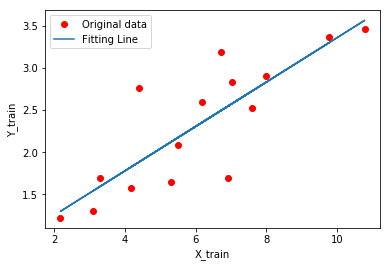

In [8]:
# 预测一下结果
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.xlabel('X_train')# X的轴标
plt.ylabel('Y_train')# Y的轴标
plt.legend()# 显示图例 link 
plt.show()

# 手动实现一元线性回归（不使用 nn模型）

In [9]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [10]:
#准备训练集
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                  [9.779],[6.182],[7.59],[2.167],[7.042],
                  [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
# 转为 Tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)
# 转为 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

In [11]:
# 定义 变量 w 和 b
w = Variable(t.randn(1), requires_grad = True)
b = Variable(t.zeros(1), requires_grad = True)
# print(w,'\n',b)

In [12]:
# 创建 一元回归模型
def linear_model(x):
    return x * w + b

In [15]:
# 定义误差函数
def get_loss(y_, y):
    return t.mean((y_ - y)**2)

loss.backward()
w.grad
b.grad

tensor([-14.0845])

In [16]:
# 迭代中计算
for epoch in range(20):
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    n = 1e-2# 学习率
    # 计算梯度
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    # 更新数据
    w.data = w.data - n*w.grad.data
    b.data = b.data - n*b.grad.data
    
    print("epoch: {} , loss: {}".format(epoch, loss.item()))

epoch: 0 , loss: 55.737789154052734
epoch: 1 , loss: 1.2413136959075928
epoch: 2 , loss: 0.23253661394119263
epoch: 3 , loss: 0.21364285051822662
epoch: 4 , loss: 0.21306979656219482
epoch: 5 , loss: 0.21283692121505737
epoch: 6 , loss: 0.21261152625083923
epoch: 7 , loss: 0.212387353181839
epoch: 8 , loss: 0.21216437220573425
epoch: 9 , loss: 0.21194249391555786
epoch: 10 , loss: 0.2117217630147934
epoch: 11 , loss: 0.21150217950344086
epoch: 12 , loss: 0.21128371357917786
epoch: 13 , loss: 0.21106639504432678
epoch: 14 , loss: 0.21085016429424286
epoch: 15 , loss: 0.21063505113124847
epoch: 16 , loss: 0.21042098104953766
epoch: 17 , loss: 0.21020810306072235
epoch: 18 , loss: 0.20999625325202942
epoch: 19 , loss: 0.2097855657339096


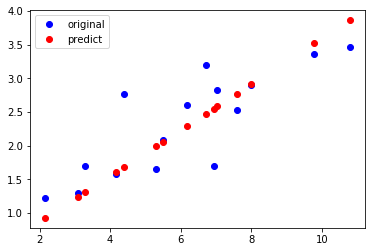

In [17]:
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='original')
plt.plot(x_train.data.numpy(),y_.data.numpy(),'ro',label='predict')
plt.legend()
plt.show()